In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
#This is the code that loads the dataset
df = pd.read_csv("diabetes_.csv")

#and now I am displaying the first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Here's the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking the missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 2: Handling missing data

#### Since there are no missing values, no imputation or row deletion is required but in real-world datasets, missing values are handled using mean/median imputation and dropping rows and columns which we have done in previous worksheet.

### Step 3: Feature engineering and train-test split

In [ ]:
#Separate features and target
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

In [ ]:
#Manual train-test split (70-30)
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

### Step 4: Implementation of KNN from scratch

In [ ]:
#Here we measure the distance using euclidean distance function

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
#Now we predict class for one sample

def predict_single(x_train, y_train, x_query, k):
    distances = []

    for i in range(len(x_train)):
        dist = euclidean_distance(x_train[i], x_query)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)

In [ ]:
#Predict for all test samples

def predict_knn(x_train, y_train, x_test, k):
    predictions = []
    for x in x_test:
        predictions.append(predict_single(x_train, y_train, x, k))
    return np.array(predictions)

In [ ]:
#Now accuracy function

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [ ]:
#Running KNN here (k = 5)

k = 5
y_pred = predict_knn(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)

print("Accuracy (Original Data):", acc)

Accuracy (Original Data): 0.7142857142857143


# Problem 2: Experimentation with feature scaling

#### KNN is distance based, so features with large values dominate. We apply standard scaling manually.

In [ ]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [ ]:
#Scale full dataset
X_scaled = standard_scaler(X)

#Train-test split again
X_train_s, X_test_s = X_scaled[train_idx], X_scaled[test_idx]

In [ ]:
#Running KNN on scaled data

y_pred_scaled = predict_knn(X_train_s, y_train, X_test_s, k)
acc_scaled = accuracy(y_test, y_pred_scaled)

print("Accuracy (Scaled Data):", acc_scaled)

Accuracy (Scaled Data): 0.7402597402597403


# Problem 3: Experimentation with Different k values

In [ ]:
#k from 1 to 15

k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

In [ ]:
for k in k_values:
    start = time.time()
    preds = predict_knn(X_train, y_train, X_test, k)
    time_original.append(time.time() - start)
    acc_original.append(accuracy(y_test, preds))

    start = time.time()
    preds_s = predict_knn(X_train_s, y_train, X_test_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(accuracy(y_test, preds_s))

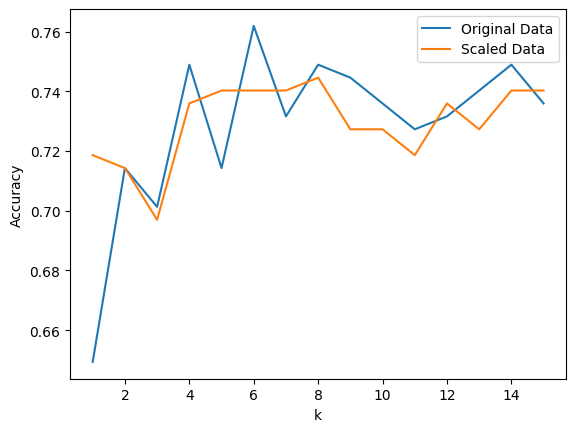

In [ ]:
#Visualization

plt.figure()
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

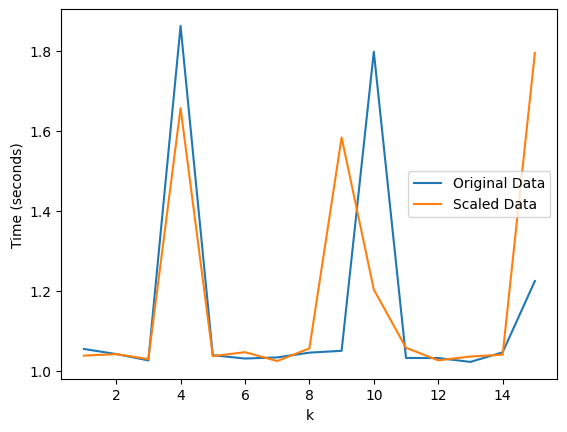

In [ ]:
#k vs time taken

plt.figure()
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

# Problem 3: Analysis and Discussion


### From problem 1 - KNN classification


#### **Dataset Overview:** The diabetes dataset was loaded using pandas and explored to understand its structure. The dataset contains numerical features and a target column named Outcome. No missing values were found, so no additional data cleaning was required.

#### **Train-Test Split:** The dataset was divided into features (X) and target (y). The data was shuffled and split into training and testing sets using a 70%–30% ratio.

#### **KNN Implementation:** The KNN algorithm was implemented from scratch using Euclidean distance. For each test sample, distances were calculated from all training samples, and the class was predicted using majority voting among the k nearest neighbors. The performance of the model was evaluated using accuracy.

### From Problem 2: Feature Scaling

#### **Effect of Scaling:** Feature scaling was applied because KNN is a distance-based algorithm. After scaling the data, the model showed better accuracy compared to the original dataset. This is because scaling ensures that all features contribute equally to the distance calculation.

### From Problem 3: Analysis and Discussion

#### **Effect of k on Accuracy:** When the value of k is small, the model is sesitive to noise and may overfit. As k increases, the accuracy becomes more stable. Very large values of k can cause underfitting and reduce accuracy.

#### **Effect of k on Time:** The time taken for prediction increases as k increases because the algorithm needs to compute distances and sort them to find the nearest neighbours.

#### **Optimal Value of k:** From the accuracy graph, an optimal value of k = 7  was selected as it provides good and stable accuracy.

# Problem 4 - Additional Discussion

#### **Limitations of KNN:** KNN requires high computation during prediction and needs to store all training data. It also performs poorly with large and high-dimensional datasets.

#### **Improving KNN Performance:** KNN performance can be improved by using feature scaling, dimensionality reduction, and approximate nearest neighbor techniques.